In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
df = pd.read_csv('../Data/Initial_Data.csv')
df


,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,...,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,2.000000,2.000000,2.000000,7.000000,3.666667,7.000000,3.666667,3.666667,1000000.0
1,23717,0,10.0,1.0,NaN,7.0,1.0,1.0,4.0,NaN,...,2.000000,7.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN
2,19474,0,7.0,7.0,NaN,7.0,NaN,1.0,1.0,4.0,...,7.000000,5.571429,5.571429,5.571429,7.000000,7.000000,7.000000,7.000000,7.000000,1000620.0
3,15505,0,7.0,1.0,1.0,NaN,1.0,NaN,7.0,1.0,...,6.090909,7.000000,NaN,NaN,4.500000,5.333333,7.000000,5.333333,3.666667,1000170.0
4,1538,1,NaN,NaN,1.0,1.0,1.0,1.0,1.0,4.0,...,2.000000,2.000000,2.000000,2.000000,3.666667,7.000000,7.000000,7.000000,3.666667,1000270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13215,0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,...,-3.000000,NaN,NaN,-3.000000,NaN,7.000000,7.000000,7.000000,7.000000,1000010.0
19996,938,0,4.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,2.000000,NaN,2.000000,2.000000,7.000000,7.000000,NaN,7.000000,7.000000,1000020.0
19997,11823,0,7.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,...,NaN,7.000000,7.000000,4.222222,7.000000,7.000000,5.333333,5.333333,5.333333,1001060.0
19998,14609,0,10.0,4.0,1.0,10.0,1.0,1.0,1.0,NaN,...,7.000000,4.857143,4.857143,3.428571,7.000000,7.000000,7.000000,7.000000,7.000000,1000950.0


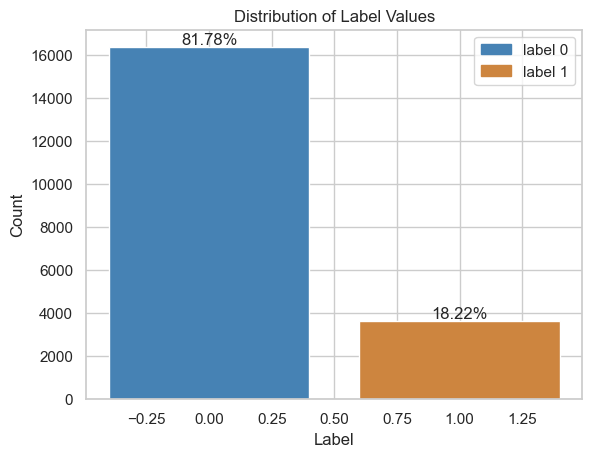

In [239]:

from matplotlib.patches import Patch
label_counts = df['label'].value_counts()

bars = plt.bar(label_counts.index, label_counts.values, color=['steelblue', 'peru'])

plt.title('Distribution of Label Values')
plt.xlabel('Label')
plt.ylabel('Count')

legend_labels = [Patch(color='steelblue', label='label ' + str(label_counts.index[0])), 
                 Patch(color='peru', label='label ' + str(label_counts.index[1]))]

plt.legend(handles=legend_labels)
for i, count in enumerate(label_counts):
    plt.text(i, count, f'{count/len(df)*100:.2f}%', ha='center', va='bottom')

plt.show()


Dữ liệu của đặc trưng: label 0 (81,78%) và label 1 chiếm (18.22%), điều
đó cho thấy là dữ liệu của chúng ta có sự mất cân bằng, do đó cần sử
dụng kĩ thuật resampling để cân bằng bộ dữ liệu.

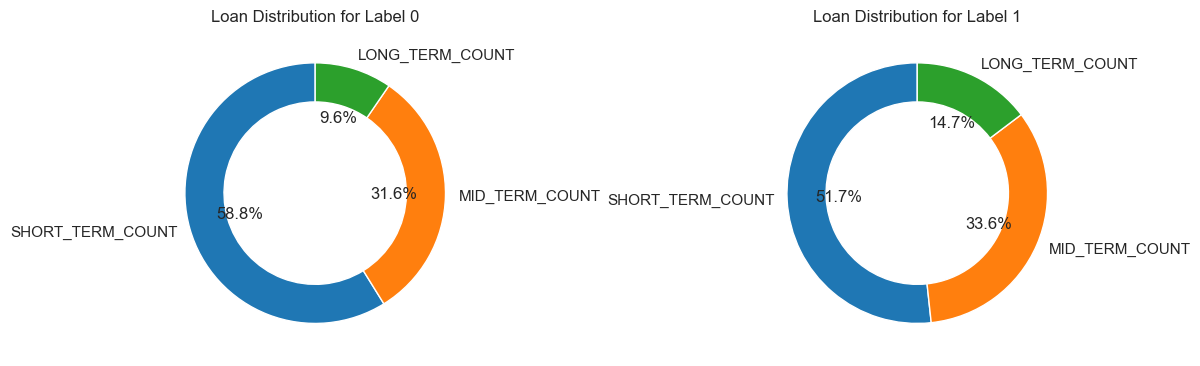

In [240]:

loan_columns = ['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']
df_loan_distribution = df.groupby('label')[loan_columns].sum()

labels = df_loan_distribution.index
short_term = df_loan_distribution['SHORT_TERM_COUNT']
mid_term = df_loan_distribution['MID_TERM_COUNT']
long_term = df_loan_distribution['LONG_TERM_COUNT']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, label in enumerate(labels):
    sizes = [short_term[i], mid_term[i], long_term[i]]
    
    axes[i].pie(sizes,
                labels=loan_columns,
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                wedgeprops={'width': 0.3})
    axes[i].set_title(f'Loan Distribution for Label {label}')

plt.tight_layout()
plt.show()


SHORT_TERM_COUNT chiếm đa số cho thấy khách hàng ưa chuộng
vay ngắn hạn. Tuy nhiên, tỉ lệ về vay ngắn, trung và dài hạn trên cả label
0 và 1 khá tương tự nhau. Vì vậy, không thể căn cứ vào số khoản nợ để
đánh giá một khách hàng có khả năng trả nợ đúng hạn hay không.

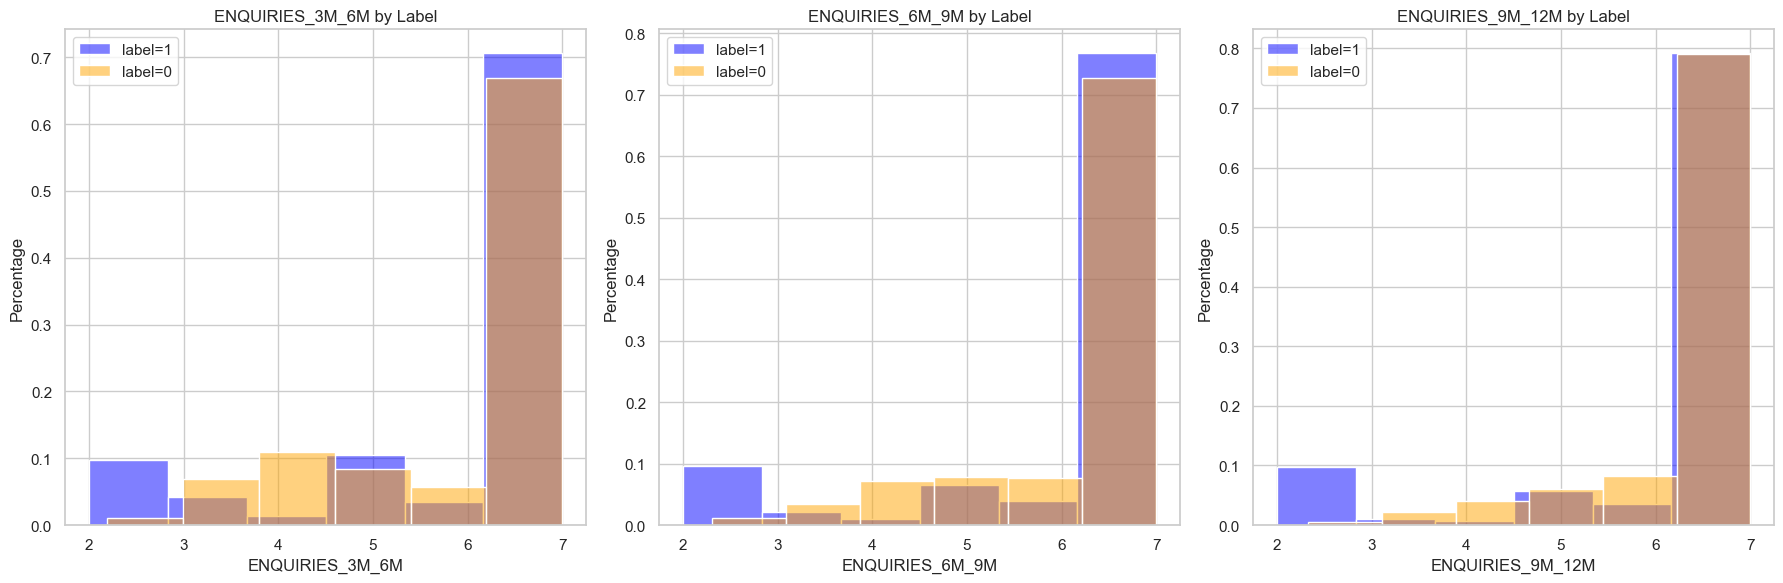

In [241]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(
    data=df[df['label'] == 1], 
    x="ENQUIRIES_3M_6M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[0],
    color='blue',  
    label='label=1',
    alpha=0.5  
)

sns.histplot(
    data=df[df['label'] == 0],  
    x="ENQUIRIES_3M_6M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[0],
    color='orange',  
    label='label=0',
    alpha=0.5  
)

axes[0].set_title("ENQUIRIES_3M_6M by Label")
axes[0].set_xlabel("ENQUIRIES_3M_6M")
axes[0].set_ylabel("Percentage")
axes[0].legend()

sns.histplot(
    data=df[df['label'] == 1],  
    x="ENQUIRIES_6M_9M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[1],
    color='blue',  
    label='label=1',
    alpha=0.5  
)

sns.histplot(
    data=df[df['label'] == 0],  
    x="ENQUIRIES_6M_9M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[1],
    color='orange',  
    label='label=0',
    alpha=0.5  
)

axes[1].set_title("ENQUIRIES_6M_9M by Label")
axes[1].set_xlabel("ENQUIRIES_6M_9M")
axes[1].set_ylabel("Percentage")
axes[1].legend()

sns.histplot(
    data=df[df['label'] == 1],  
    x="ENQUIRIES_9M_12M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[2],
    color='blue',  
    label='label=1',
    alpha=0.5  
)

sns.histplot(
    data=df[df['label'] == 0],  
    x="ENQUIRIES_9M_12M",
    multiple="stack",
    bins=6,
    stat="probability", 
    ax=axes[2],
    color='orange',  
    label='label=0',
    alpha=0.5  
)

axes[2].set_title("ENQUIRIES_9M_12M by Label")
axes[2].set_xlabel("ENQUIRIES_9M_12M")
axes[2].set_ylabel("Percentage")
axes[2].legend()

plt.tight_layout()
plt.show()


Đặc biệt, khách hàng vừa có ít thẻ tín dụng, vừa có ít lượt tra cứu (1-2
lượt) hoặc không tra cứu tín dụng liên quan đến các sản phẩm tài chính
có khả năng rất cao sẽ trả nợ không đúng hạn.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


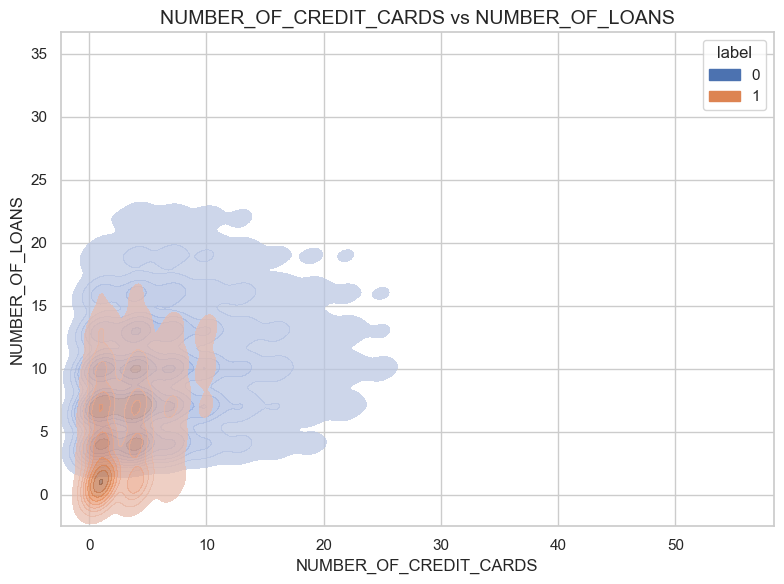

In [242]:
color_palette = sns.color_palette("coolwarm", as_cmap=True)

#Biểu đồ NUMBER_OF_CREDIT_CARDS vs NUMBER_OF_LOANS
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="NUMBER_OF_CREDIT_CARDS",
    y="NUMBER_OF_LOANS",
    hue="label",
    fill=True,
    alpha=0.7, 
    cmap=color_palette
)
plt.title("NUMBER_OF_CREDIT_CARDS vs NUMBER_OF_LOANS", fontsize=14)
plt.tight_layout()
plt.show()

Nhận thấy rằng những khách hàng không có khả năng trả nợ đúng hạn
thường có ít thẻ tín dụng được cấp từ ngân hàng hay tổ chức phi ngân
hàng.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


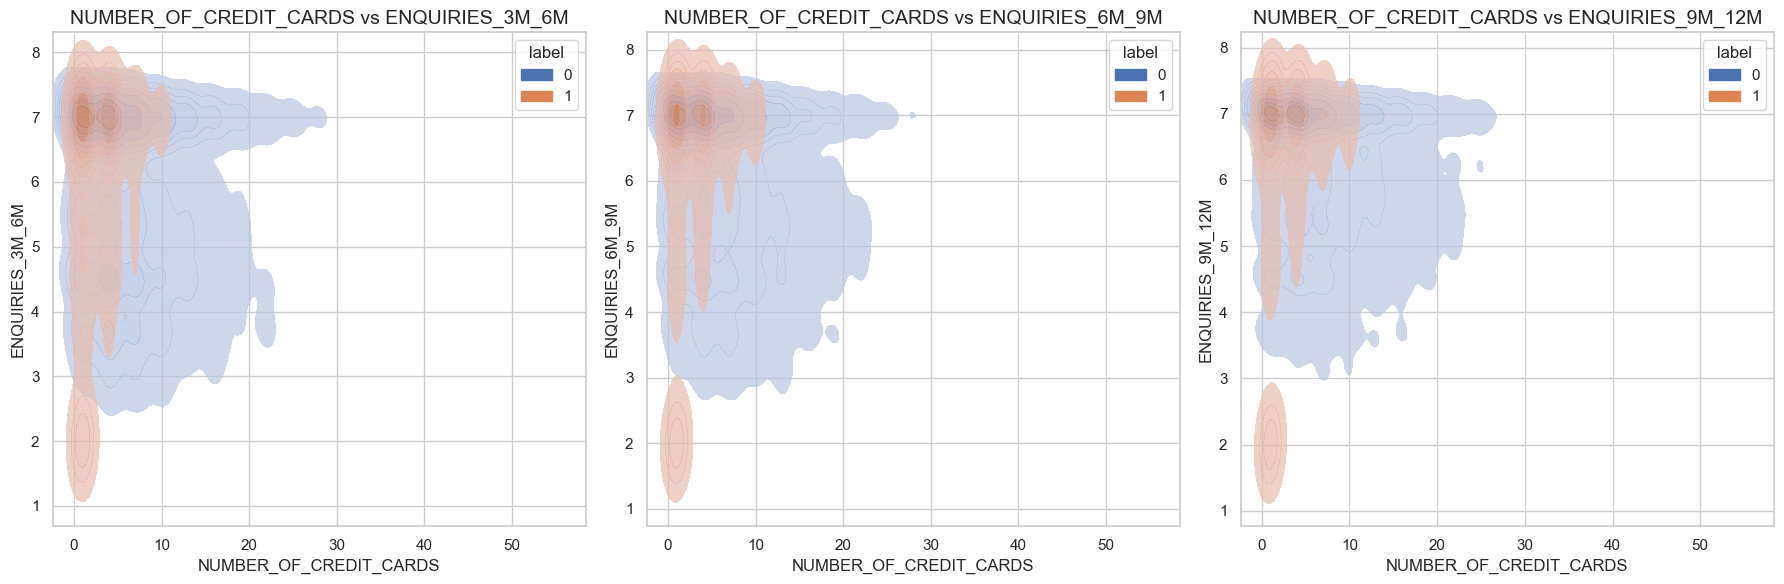

In [243]:

color_palette = sns.color_palette("coolwarm", as_cmap=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ 1: NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_3M_6M
sns.kdeplot(
    data=df,
    x="NUMBER_OF_CREDIT_CARDS",
    y="ENQUIRIES_3M_6M",
    hue="label",
    fill=True,
    alpha=0.7,  
    ax=axes[0], 
    cmap=color_palette
)
axes[0].set_title("NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_3M_6M", fontsize=14)

# Biểu đồ 2: NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_6M_9M
sns.kdeplot(
    data=df,
    x="NUMBER_OF_CREDIT_CARDS",
    y="ENQUIRIES_6M_9M",
    hue="label",
    fill=True,
    alpha=0.7, 
    ax=axes[1],  
    cmap=color_palette
)
axes[1].set_title("NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_6M_9M", fontsize=14)

# Biểu đồ 3: NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_9M_12M
sns.kdeplot(
    data=df,
    x="NUMBER_OF_CREDIT_CARDS",
    y="ENQUIRIES_9M_12M",
    hue="label",
    fill=True,
    alpha=0.7,  
    ax=axes[2], 
    cmap=color_palette
)
axes[2].set_title("NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_9M_12M", fontsize=14)

plt.tight_layout()
plt.show()

- Dễ thấy rằng số lượt tra cứu tín dụng liên quan đến sản phẩm tài chính
càng ít thì khả năng khách hàng trả nợ không đúng hạn càng cao và
ngược lại.
- Tuy nhiên, thời điểm thực hiện tra cứu tín dụng không ảnh hưởng tới khả
năng trả nợ của khách hàng.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


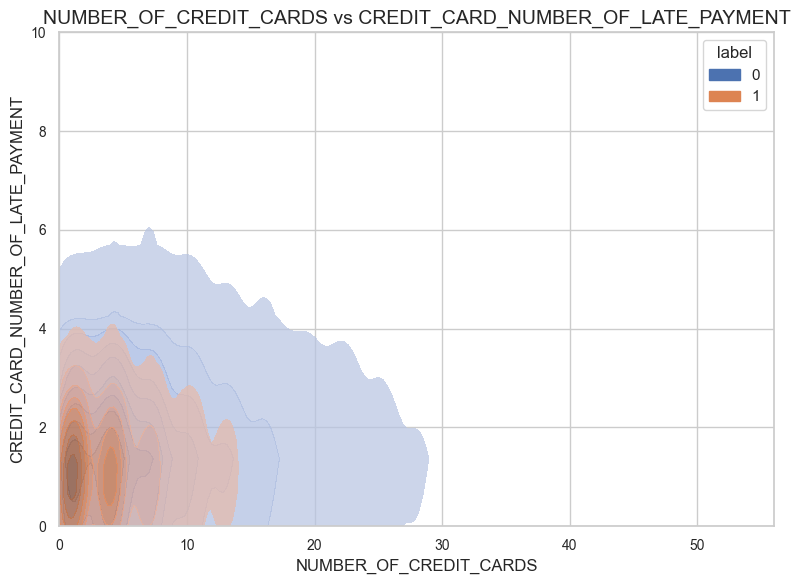

In [244]:
# sns.set(style="whitegrid")
# color_palette = sns.color_palette("coolwarm", as_cmap=True)


plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="NUMBER_OF_CREDIT_CARDS",
    y="CREDIT_CARD_NUMBER_OF_LATE_PAYMENT",
    hue="label",
    fill=True,
    alpha=0.7,  
    cmap=color_palette
)

plt.title("NUMBER_OF_CREDIT_CARDS vs CREDIT_CARD_NUMBER_OF_LATE_PAYMENT", fontsize=14)

plt.xlim(0, df["NUMBER_OF_CREDIT_CARDS"].max() + 1)
plt.ylim(0, 10) 

plt.xlabel("NUMBER_OF_CREDIT_CARDS", fontsize=12)
plt.ylabel("CREDIT_CARD_NUMBER_OF_LATE_PAYMENT", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Cũng khá bất ngờ khi những khách hàng không có khả năng trả
nợ đúng hạn có ít lần thanh toán trễ trên các thẻ tín dụng. Điều này có thể
do khách hàng thuộc nhóm này có số lượng thẻ tín dụng khá ít.

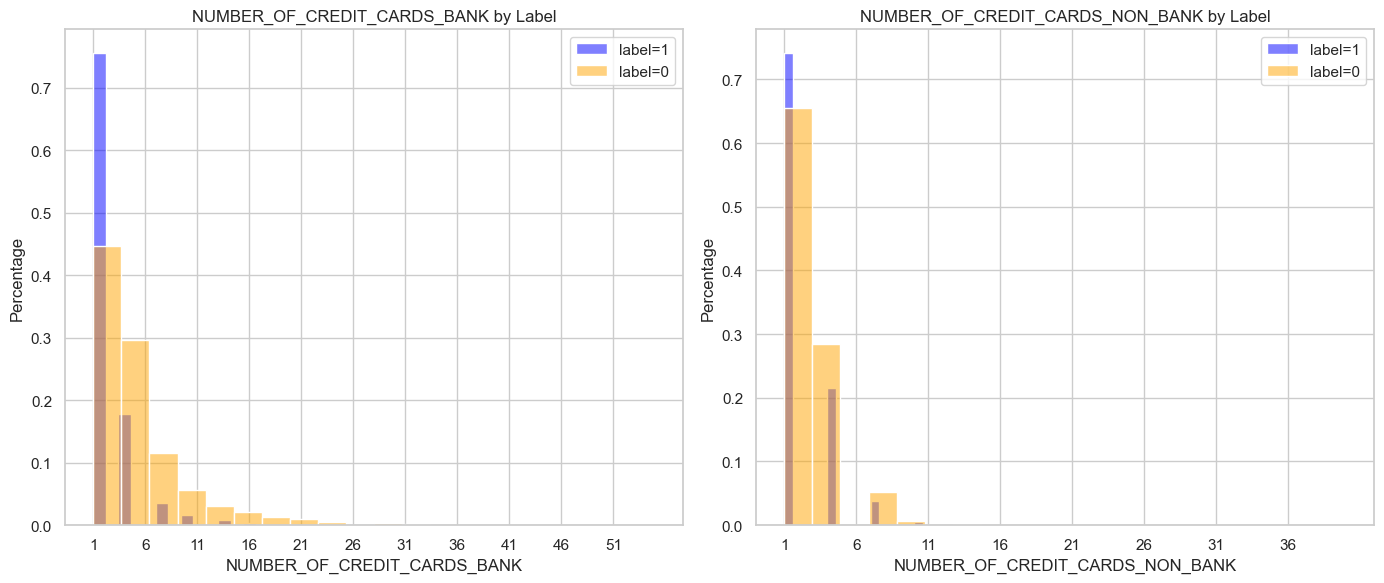

In [245]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    data=df[df['label'] == 1], 
    x="NUMBER_OF_CREDIT_CARDS_BANK",
    multiple="stack",
    bins=20,
    stat="probability",  
    ax=axes[0],
    color='blue',  
    label='label=1',
    alpha=0.5  
)

sns.histplot(
    data=df[df['label'] == 0],  
    x="NUMBER_OF_CREDIT_CARDS_BANK",
    multiple="stack",
    bins=20,
    stat="probability",  
    ax=axes[0],
    color='orange',  
    label='label=0',
    alpha=0.5  
)

xticks = range(int(df['NUMBER_OF_CREDIT_CARDS_BANK'].min()), int(df['NUMBER_OF_CREDIT_CARDS_BANK'].max()) + 1, 5)
axes[0].set_xticks(xticks)

axes[0].set_title("NUMBER_OF_CREDIT_CARDS_BANK by Label")
axes[0].set_xlabel("NUMBER_OF_CREDIT_CARDS_BANK")
axes[0].set_ylabel("Percentage")
axes[0].legend()

sns.histplot(
    data=df[df['label'] == 1],  
    x="NUMBER_OF_CREDIT_CARDS_NON_BANK",
    multiple="stack",
    bins=20,
    stat="probability",  
    ax=axes[1],
    color='blue',  
    label='label=1',
    alpha=0.5  
)

sns.histplot(
    data=df[df['label'] == 0],  
    x="NUMBER_OF_CREDIT_CARDS_NON_BANK",
    multiple="stack",
    bins=20,
    stat="probability",  
    ax=axes[1],
    color='orange',  
    label='label=0',
    alpha=0.5  
)

xticks_non_bank = range(int(df['NUMBER_OF_CREDIT_CARDS_NON_BANK'].min()), int(df['NUMBER_OF_CREDIT_CARDS_NON_BANK'].max()) + 1, 5)
axes[1].set_xticks(xticks_non_bank)

axes[1].set_title("NUMBER_OF_CREDIT_CARDS_NON_BANK by Label")
axes[1].set_xlabel("NUMBER_OF_CREDIT_CARDS_NON_BANK")
axes[1].set_ylabel("Percentage")
axes[1].legend()

plt.tight_layout()
plt.show()


Như đã thấy, khách hàng không có khả năng trả nợ đúng hạn sẽ có xu
hướng sử dụng ít thẻ tín dụng. Tuy nhiên, việc thẻ tín dụng được cấp bởi
ngân hàng hay tổ chức phi ngân hàng không ảnh hưởng tới việc xác định
khả năng trả nợ của khách hàng.